Use only the red points for forming the red white line

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_red_line(image_path):
    """Find and draw a straight line representing red tape on the surface."""
    image = cv2.imread(image_path)
    if image is None:
        print("Error loading image")
        return None, None, None
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define HSV range for red color and create masks
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([179, 255, 255])
    mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask = cv2.bitwise_or(mask_red1, mask_red2)

    # Find points in the mask
    points = np.column_stack(np.where(mask.transpose() > 0))
    
    # Fit a line to these points
    processed_image = image.copy()
    if len(points) > 0:
        [vx, vy, x, y] = cv2.fitLine(points, cv2.DIST_L2, 0, 0.01, 0.01)
        lefty = int((-x*vy/vx) + y)
        righty = int(((processed_image.shape[1]-x)*vy/vx)+y)
        cv2.line(processed_image, (processed_image.shape[1]-1, righty), (0, lefty), (255, 0, 0), 3)

    return image, mask, processed_image

def process_image(path):
    image, mask, processed_image = find_red_line(path)

    # Check if the images were loaded properly
    if image is not None and mask is not None and processed_image is not None:
        # Convert mask to color to match dimensionality for display
        mask_color = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

        # Display the results
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(mask_color, cv2.COLOR_BGR2RGB))
        plt.title('Mask')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with Red Line')
        plt.axis('off')

        plt.show()
    else:
        print("Failed to process the image.")


Red white lines can have joints as well

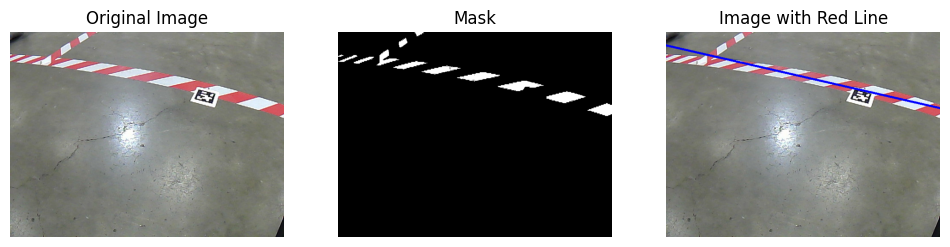

In [3]:
# Load and process the image
path = 'dataset/may15_run00_cam08/frame_760.png'

process_image(path)

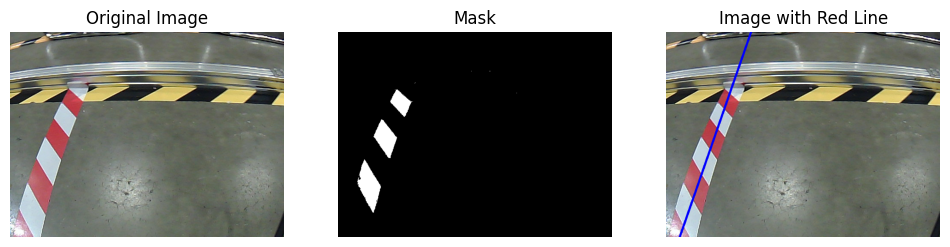

In [4]:
# Load and process the image
path = 'dataset/may15_run00_cam08/frame_940.png'

process_image(path)

We can just use the red points to form a convex hull and then calculate the perimeter of the convex hull. The perimeter of a convex hull is the sum of the distances between consecutive points in the convex hull.

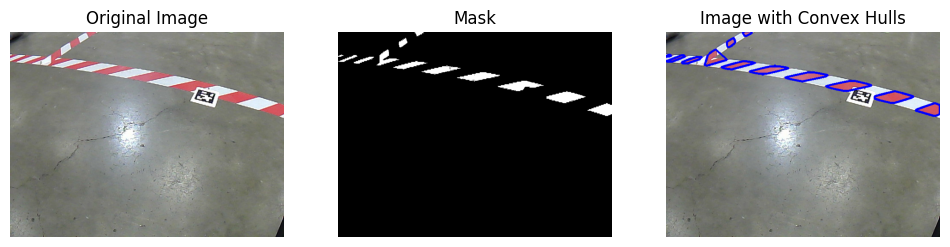

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_red_lines_with_convex_hull(image_path):
    """Find and draw convex hulls around red tape on the surface."""
    image = cv2.imread(image_path)
    if image is None:
        print("Error loading image")
        return None, None, None
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define HSV range for red color and create masks
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([179, 255, 255])
    mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask = cv2.bitwise_or(mask_red1, mask_red2)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    processed_image = image.copy()
    for contour in contours:
        # Calculate the convex hull for the contour
        hull = cv2.convexHull(contour)
        # Draw the convex hull
        cv2.drawContours(processed_image, [hull], 0, (255, 0, 0), 3)

    return image, mask, processed_image

def process_image(path):
    image, mask, processed_image = find_red_lines_with_convex_hull(path)

    # Check if the images were loaded properly
    if image is not None and mask is not None and processed_image is not None:
        # Convert mask to color to match dimensionality for display
        mask_color = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

        # Display the results
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(mask_color, cv2.COLOR_BGR2RGB))
        plt.title('Mask')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with Convex Hulls')
        plt.axis('off')

        plt.show()
    else:
        print("Failed to process the image.")

# Example usage
path = 'dataset/may15_run00_cam08/frame_760.png'
process_image(path)

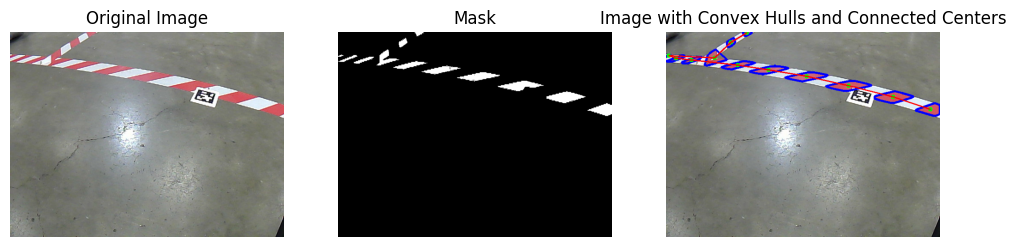

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_red_lines_with_convex_hull(image_path):
    """Find convex hulls around red tape on the surface and connect their centers."""
    image = cv2.imread(image_path)
    if image is None:
        print("Error loading image")
        return None, None, None
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define HSV range for red color and create masks
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([179, 255, 255])
    mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask = cv2.bitwise_or(mask_red1, mask_red2)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    processed_image = image.copy()
    centers = []
    for contour in contours:
        # Calculate the convex hull for the contour
        hull = cv2.convexHull(contour)
        # Draw the convex hull
        cv2.drawContours(processed_image, [hull], 0, (255, 0, 0), 3)
        
        # Calculate the centroid of the hull
        M = cv2.moments(hull)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            centers.append((cX, cY))
            # Draw the centroid
            cv2.circle(processed_image, (cX, cY), 5, (0, 255, 0), -1)

    # Connect the centers
    for i in range(1, len(centers)):
        cv2.line(processed_image, centers[i-1], centers[i], (0, 0, 255), 2)

    return image, mask, processed_image

def process_image(path):
    image, mask, processed_image = find_red_lines_with_convex_hull(path)

    # Check if the images were loaded properly
    if image is not None and mask is not None and processed_image is not None:
        # Convert mask to color to match dimensionality for display
        mask_color = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

        # Display the results
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(mask_color, cv2.COLOR_BGR2RGB))
        plt.title('Mask')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with Convex Hulls and Connected Centers')
        plt.axis('off')

        plt.show()
    else:
        print("Failed to process the image.")

# Example usage
path = 'dataset/may15_run00_cam08/frame_760.png'
process_image(path)

This is more robust than the previous approach because it doesn't rely on the fact that the red white line is a straight line. It works for multiple red white lines as well.

We'll need to use similar code for the yellow black line as well since the yellow black line can also have joints.